# Math 76 HW3, Fall 2024

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from hw3_helper_funcs import *

# Problem 1

Derive the expressions on p. 64 of the textbook coming from the statistical aspects of the Tikhonov solution given additive Gaussian white noise.  Specifically derive the equations for the covariance matrix and the expectation of the solution which introduces bias. 

**Response:** *(it may be easier to do this on paper and submit it alongside the notebook)*

# Problem 4.4 (From Oversmoothing to Undersmoothing)

## Part A
Use the `deriv2` function to generate the test problem (set $n = 32$). Then use the function `csvd` to compute the SVD of $A$, and inspect the singular singular values.



In [39]:
A, b, x = deriv2(32)
U, s, V = csvd(A)

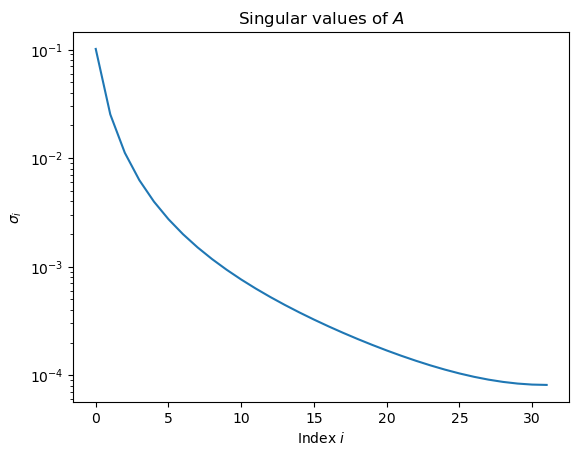

In [40]:
plt.semilogy(s)
plt.xlabel("Index $i$")
plt.ylabel("$\sigma_i$")
plt.title("Singular values of $A$")
plt.show()

## Part B

Add a small amount of noise to the right hand side, e.g., 
$$
\texttt{e = 1e-3*\text{np.random.normal(size=len(b))}}
$$
This noise is certainly not visible when plotting the right-hand side vector, but it is very significant with respect to the regularization. For a number of different regularization parameters $\lambda$ in the range $10^{-3}$ to $1$, compute the corresponding filter factors $\varphi_i^{[\lambda]}$ using the function `fil_fac`, as well as the corresponding Tikhonov solution $x_{\lambda}$ by means of
$$
\texttt{X = tikhonov(U, s, V, b, lambdah)}.
$$
For each $\lambda$, plot both the filter factors and the solution, and comment on your results. Use a logarithmic distribution of $\lambda$-values using `matplotlib`'s `semilogy()` function.

In [41]:
A, b_exact, x_exact = deriv2(32)
U, s, V = csvd(A)
np.random.seed(0)
e = 1e-3*np.random.normal(size=len(b_exact))
b_noisy = b_exact + e

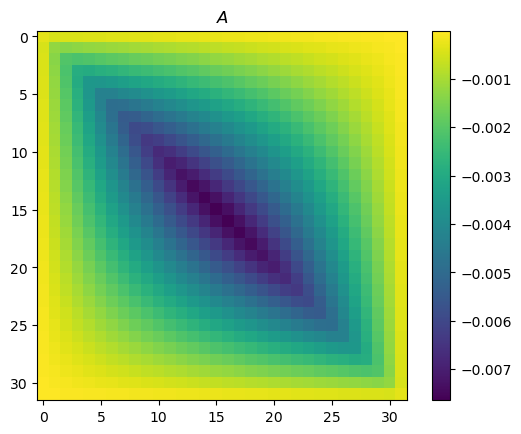

In [42]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

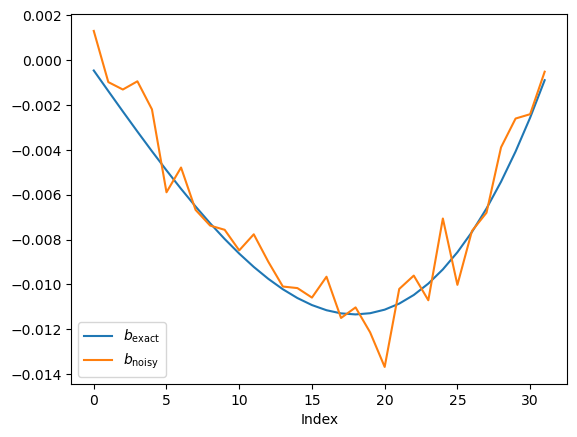

In [43]:
plt.plot(b_exact, label="$b_{\\text{exact}}$")
plt.plot(b_noisy, label="$b_{\\text{noisy}}$")
plt.xlabel("Index")
plt.legend()
plt.show()

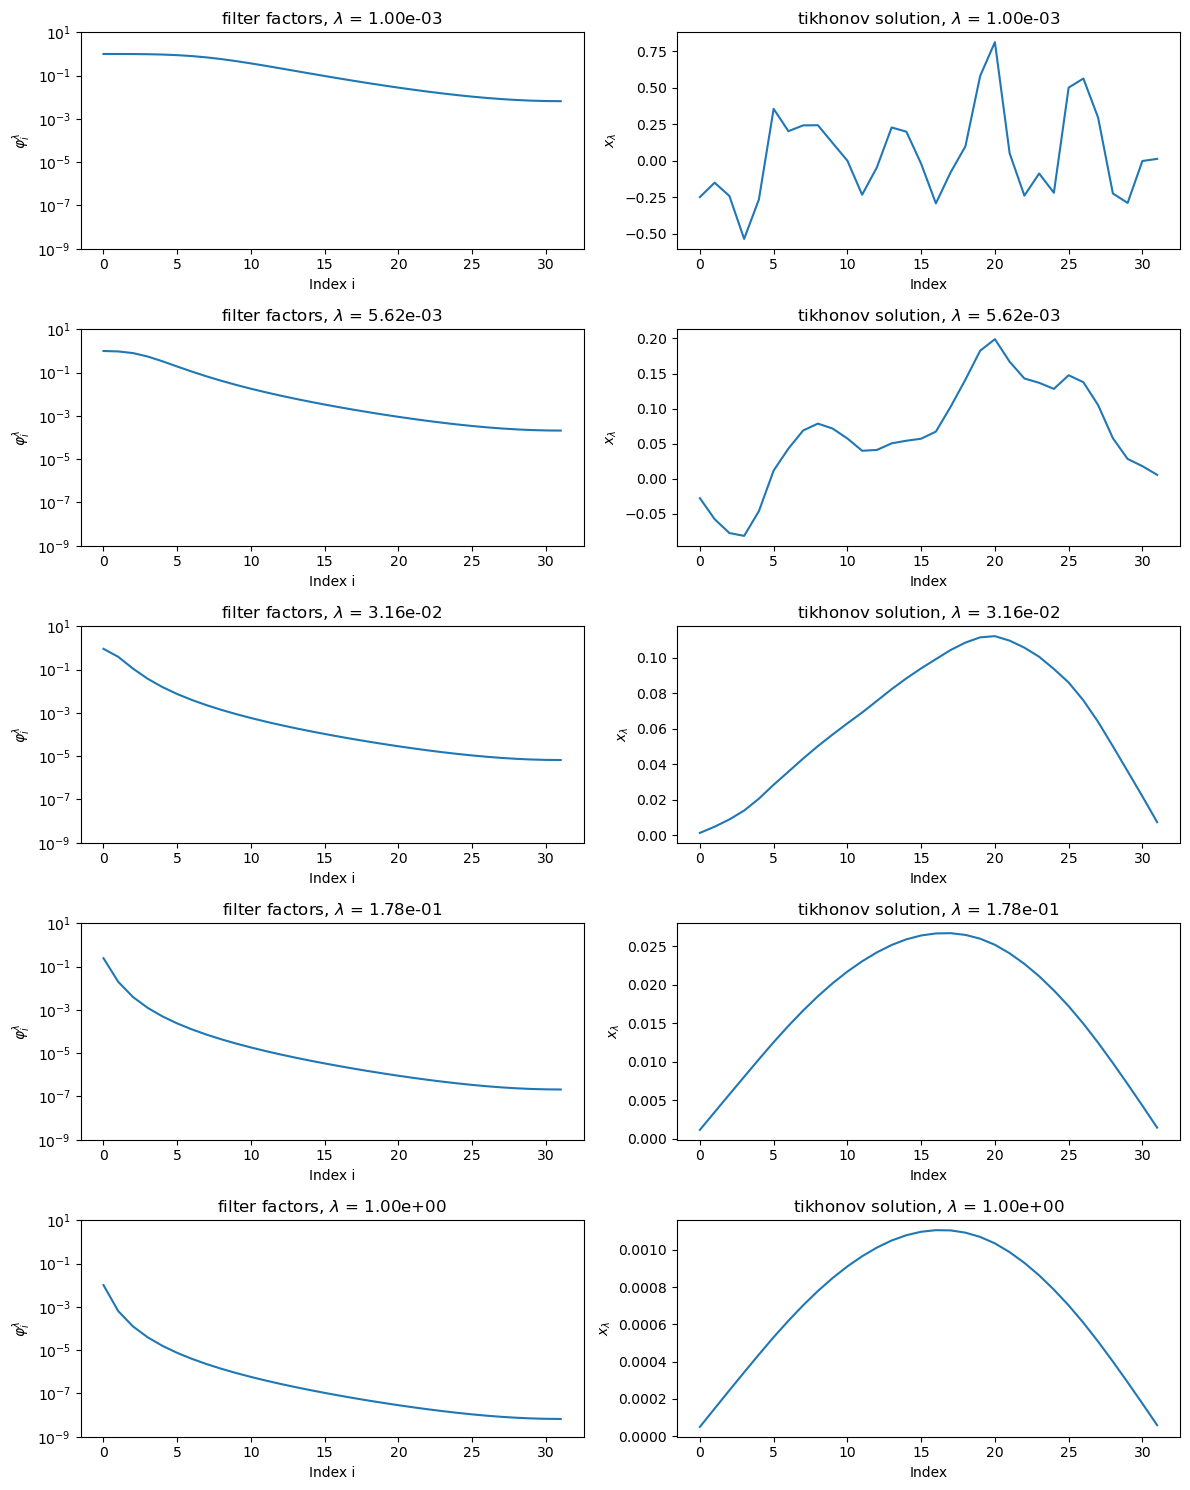

In [44]:
n_lambdahs = 5
lambdahs = np.logspace(-3, 0, n_lambdahs) # Choose 9 values of lambdah generated using np.logspace

fig, axs = plt.subplots(n_lambdahs,2,figsize=(12,15))

for j in range(n_lambdahs):

    lambdah = lambdahs[j]
    filtered_factors = fil_fac(s, [lambdah])
    axs[j,0].semilogy(filtered_factors)
    axs[j,0].set_title(f"filter factors, $\\lambda$ = {lambdah:.2e}")
    axs[j,0].set_xlabel("Index i")
    axs[j,0].set_ylabel("$\\varphi_i^{\lambda}$")
    axs[j,0].set_ybound(1e-9, 1e1)

    x_lambdah, _, _ = tikhonov(U, s, V, b_noisy, lambdahs[j])
    axs[j,1].plot(x_lambdah)
    axs[j,1].set_title(f"tikhonov solution, $\\lambda$ = {lambdahs[j]:.2e}")
    axs[j,1].set_xlabel("Index")
    axs[j,1].set_ylabel("$x_{\\lambda}$")


fig.tight_layout()
plt.show()

**Response:**

# Problem 4.6 (The L-curve)

This exercise illustrates the typical behavior of the L-curve for a discrete ill-posed problem, using the second-derivative test problem from Excercise 2.3. 


## Part A
Generate the test problem `deriv2` with $n = 64$, and add Gaussian white noise scaled such that $\| e \|_2/\| b_{\text{exact}} \|_2 = 10^{-2}$. Then use `l_curve` to plot the L-curves corresponding to the three different right-hand sides $b_{\text{exact}}$, $e$, and $b_{\text{exact}} + e$. What happens to the corner if you switch to lin-lin scale?

In [45]:
# Setup each test problem
A, b1_exact, x1_exact = deriv2(64, example=1)
A, b2_exact, x2_exact = deriv2(64, example=2)
A, b3_exact, x3_exact = deriv2(64, example=3)

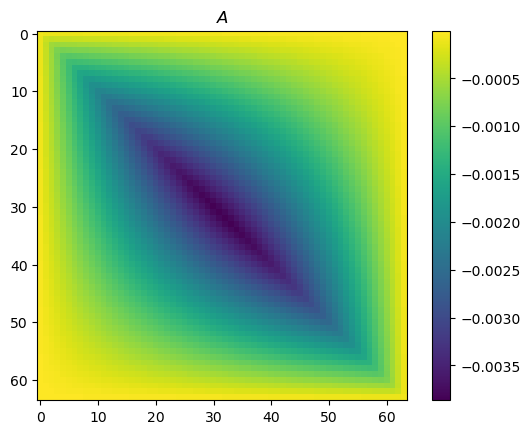

In [46]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

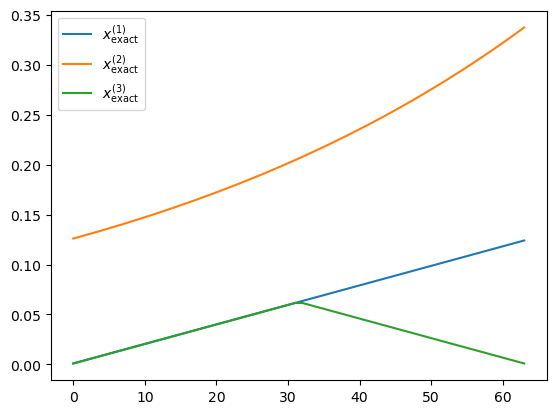

In [47]:
plt.plot(x1_exact, label="$x_{\\text{exact}}^{(1)}$")
plt.plot(x2_exact, label="$x_{\\text{exact}}^{(2)}$")
plt.plot(x3_exact, label="$x_{\\text{exact}}^{(3)}$")
plt.legend()
plt.show()

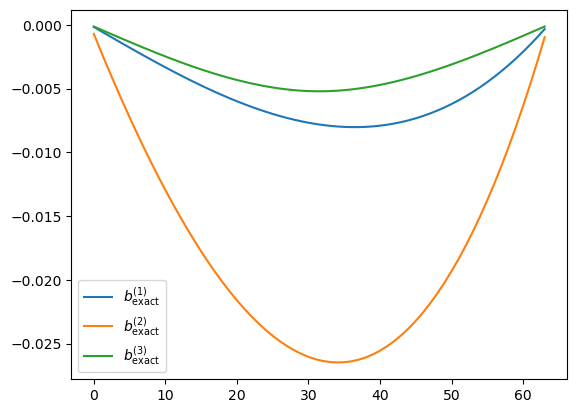

In [48]:
plt.plot(b1_exact, label="$b_{\\text{exact}}^{(1)}$")
plt.plot(b2_exact, label="$b_{\\text{exact}}^{(2)}$")
plt.plot(b3_exact, label="$b_{\\text{exact}}^{(3)}$")
plt.legend()
plt.show()

In [49]:
# Setup each test problem according to the text
A, b1_exact, x1_exact = deriv2(64, example=1)
_, b2_exact, x2_exact = deriv2(64, example=2)
_, b3_exact, x3_exact = deriv2(64, example=3) 
noise_vec = np.random.normal(size=A.shape[0])
noise_vec /= np.linalg.norm(noise_vec)
b1_perturb = noise_vec*(1e-2)*np.linalg.norm(b1_exact)
b2_perturb = noise_vec*(1e-2)*np.linalg.norm(b2_exact)
b3_perturb = noise_vec*(1e-2)*np.linalg.norm(b3_exact)
b1_noisy = b1_exact + b1_perturb
b2_noisy = b2_exact + b2_perturb
b3_noisy = b3_exact + b3_perturb

# Use csvd to get the SVD of A
U, s, V = csvd(A)

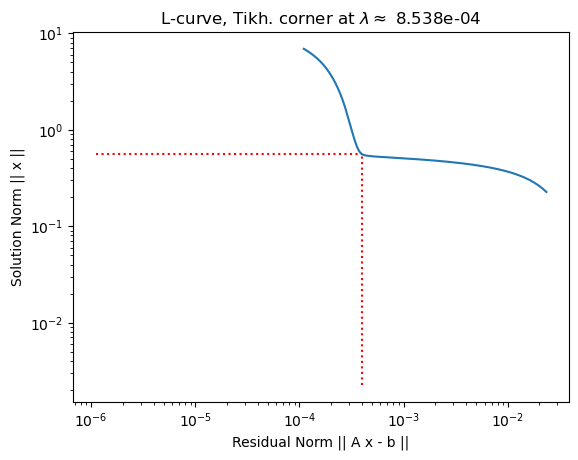

In [50]:
# Plot L-curves for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

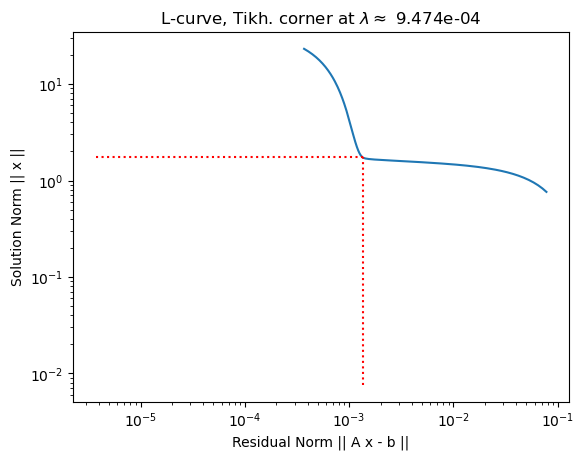

In [51]:
# Plot L-curves for the second RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)
ax = plt.gca()

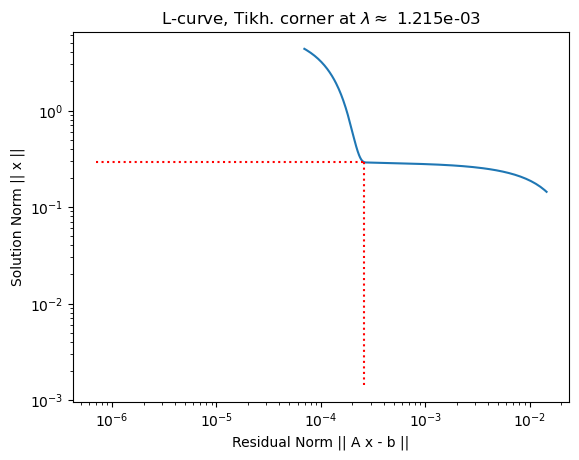

In [52]:
# Plot L-curves for the third RHS
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

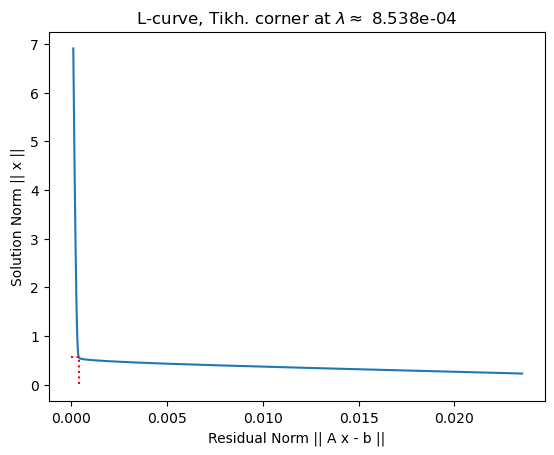

In [53]:
# Plot L-curve for the first RHS again, but use linear-linear scale instead.

### Your code for plotting the L-curve
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

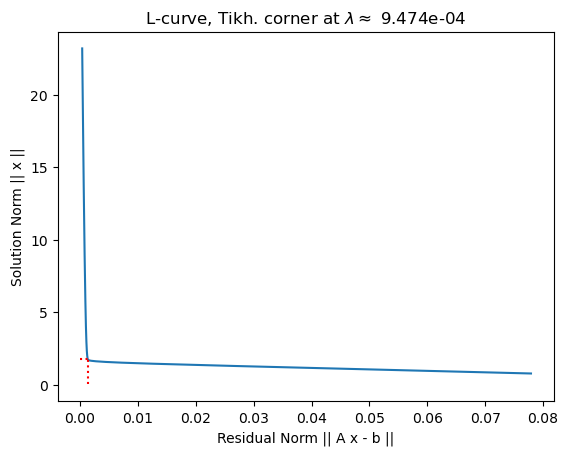

In [54]:
# Plot L-curve for the second RHS again, but use linear-linear scale instead.

### Your code for plotting the L-curve
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

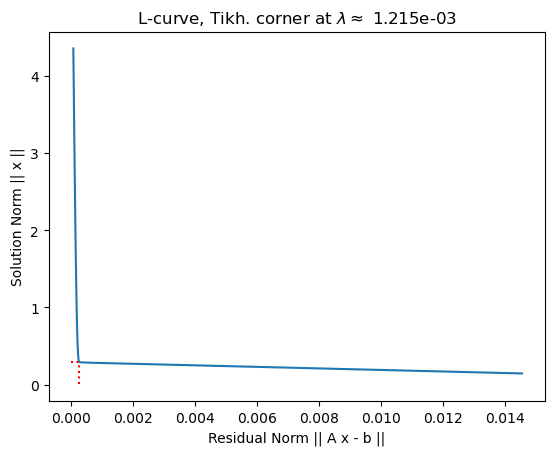

In [55]:
# Plot L-curve for the third RHS again, but use linear-linear scale instead.

### Your code for plotting the L-curve
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

**Response:**

## Part B

Switch back to log-log scale and add a horizontal line at $\| x_{\text{exact}} \|_2$, the norm of the exact solution, and a vertical line at $\|e\|_2$, the norm of the perturbation. Relate the positions of these lines to the different parts of the L-curve. 

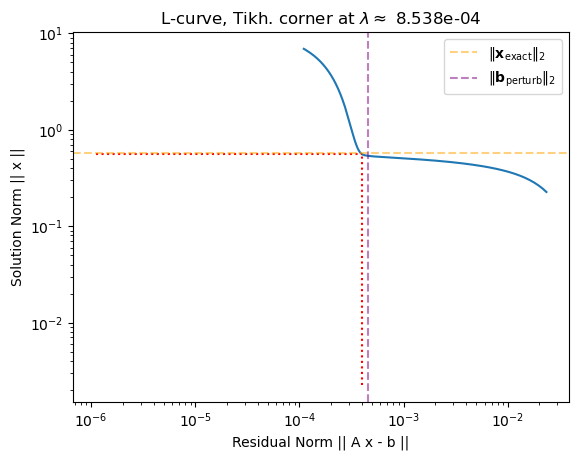

In [56]:
# Get norm of x_exact and perturbation corresponding to first RHS
x1_exact_norm = np.linalg.norm(x1_exact)
b1_perturb_norm = np.linalg.norm(b1_perturb)

# L-curve for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x1_exact (hint: use the axhline)
ax.axhline(x1_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x1_exact (hint: use the axvline)
ax.axvline(b1_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add legend
ax.legend()

plt.show()

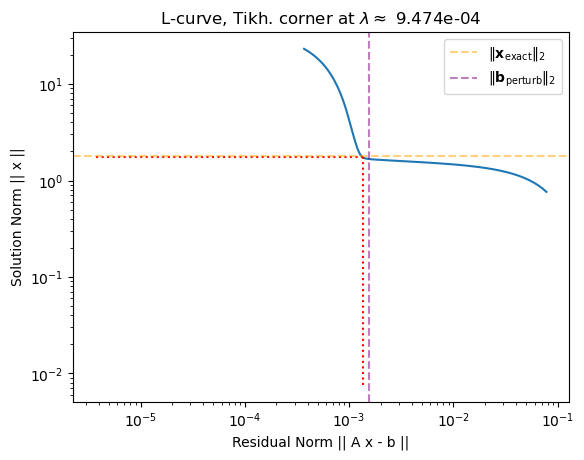

In [57]:
# Get norm of x_exact and perturbation corresponding to third RHS
x2_exact_norm = np.linalg.norm(x2_exact)
b2_perturb_norm = np.linalg.norm(b2_perturb)

# L-curve for the first RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x2_exact (hint: use the axhline)
ax.axhline(x2_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x2_exact (hint: use the axvline)
ax.axvline(b2_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add legend
ax.legend()

plt.show()

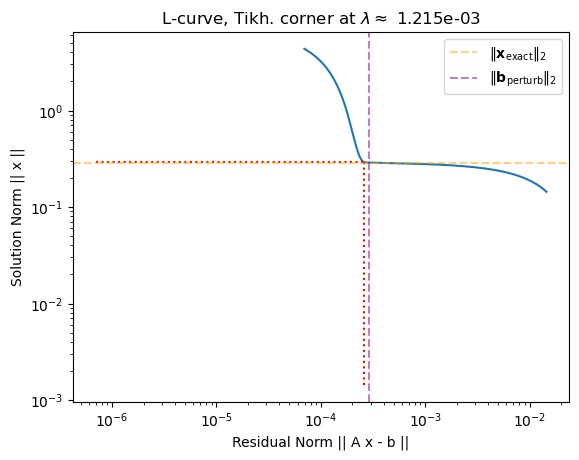

In [58]:
# Get norm of x_exact and perturbation corresponding to third RHS
x3_exact_norm = np.linalg.norm(x3_exact)
b3_perturb_norm = np.linalg.norm(b3_perturb)

# L-curve for the third RHS
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x3_exact (hint: use the axhline)
ax.axhline(x3_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x3_exact (hint: use the axvline)
ax.axvline(b3_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add legend
ax.legend()

plt.show()

**Response:**

## Part C

Find (by trial and error) a Tikhonov regularization parameter $\lambda^*$ that approximately minimizes the error $\| x_{\text{exact}} - x_{\lambda} \|_2$ between the exact solution $x_{\text{exact}}$ and the regularized solution $x_{\lambda}$. Add the point $(\| A x_{\lambda^*}  - b\|_2, \| x_{\lambda^*} \|_2)$ to the L-curve (it must lie on the L-curve corresponding to $b$). Is it near the corner? (Note: here $b$ denotes the noisy RHS data vector, *not* the noiseless RHS vector)

In [59]:
from scipy.optimize import minimize

In [60]:
### Write some code that tries to minimize || x_exact - x_lambda ||_2 for the first RHS

def _opt_func1(lambdah):
     #x_lambdah, _, _ = tikhonov(U, s, V, b1_noisy, lambdah)
     x_lambdah = np.linalg.solve((A.T @ A) + lambdah*np.eye(A.shape[1]), A.T @ b1_noisy)
     return np.linalg.norm( x1_exact - x_lambdah )

# Perform the minimization with bounds
opt_lambdah1 = minimize(_opt_func1, 1e1, bounds=[(1e-5, 1e-2)], tol=1e-9)
opt_lambdah1 = opt_lambdah1.x

xopt1 = np.linalg.solve((A.T @ A) + opt_lambdah1*np.eye(A.shape[1]), A.T @ b1_noisy)

In [61]:
### Write some code that tries to minimize || x_exact - x_lambda ||_2 for the second RHS

def _opt_func2(lambdah):
     x_lambdah = np.linalg.solve((A.T @ A) + lambdah*np.eye(A.shape[1]), A.T @ b2_noisy)
     return np.linalg.norm( x2_exact - x_lambdah )

# Perform the minimization with bounds
opt_lambdah2 = minimize(_opt_func2, 1e1, bounds=[(1e-5, 1e-2)], tol=1e-9)
opt_lambdah2 = opt_lambdah2.x

xopt2 = np.linalg.solve((A.T @ A) + opt_lambdah2*np.eye(A.shape[1]), A.T @ b2_noisy)

In [62]:
### Write some code that tries to minimize || x_exact - x_lambda ||_2 for the third RHS

def _opt_func3(lambdah):
     x_lambdah = np.linalg.solve((A.T @ A) + lambdah*np.eye(A.shape[1]), A.T @ b3_noisy)
     return np.linalg.norm( x3_exact - x_lambdah )

# Perform the minimization with bounds
opt_lambdah3 = minimize(_opt_func3, 1e1, bounds=[(1e-5, 1e-2)], tol=1e-9)
opt_lambdah3 = opt_lambdah3.x

xopt3 = np.linalg.solve((A.T @ A) + opt_lambdah3*np.eye(A.shape[1]), A.T @ b3_noisy)

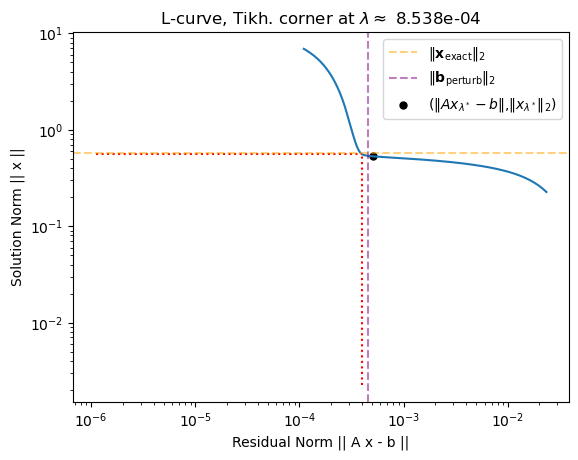

In [63]:
### Remake plot for the first RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# Get norm of x_exact and perturbation corresponding to first RHS
x1_exact_norm = np.linalg.norm(x1_exact)
b1_perturb_norm = np.linalg.norm(b1_perturb)

# L-curve for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x1_exact (hint: use the axhline)
ax.axhline(x1_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x1_exact (hint: use the axvline)
ax.axvline(b1_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add the point
ax.scatter( [np.linalg.norm((A @ xopt1) - b1_noisy)], [np.linalg.norm(xopt1)] , marker="o", color="k", s=25, label="($\| A x_{\\lambda^*} - b \|$,$\| x_{\\lambda^*} \|_2$)")

# Add legend
ax.legend()

plt.show()

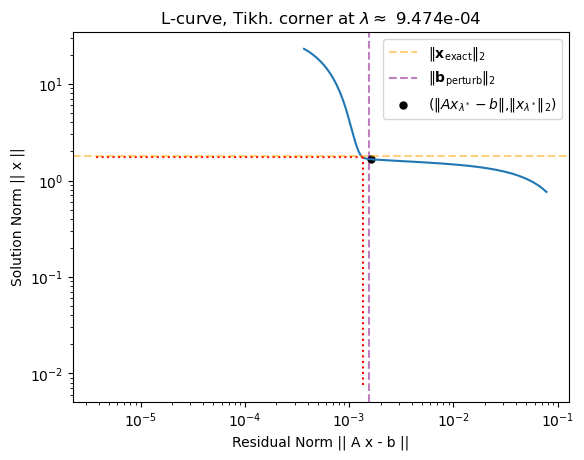

In [64]:
### Remake plot for the second RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# Get norm of x_exact and perturbation corresponding to first RHS
x2_exact_norm = np.linalg.norm(x2_exact)
b2_perturb_norm = np.linalg.norm(b2_perturb)

# L-curve for the first RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x1_exact (hint: use the axhline)
ax.axhline(x2_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x1_exact (hint: use the axvline)
ax.axvline(b2_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add the point
ax.scatter( [np.linalg.norm((A @ xopt2) - b2_noisy)], [np.linalg.norm(xopt2)] , marker="o", color="k", s=25, label="($\| A x_{\\lambda^*} - b \|$,$\| x_{\\lambda^*} \|_2$)")

# Add legend
ax.legend()

plt.show()

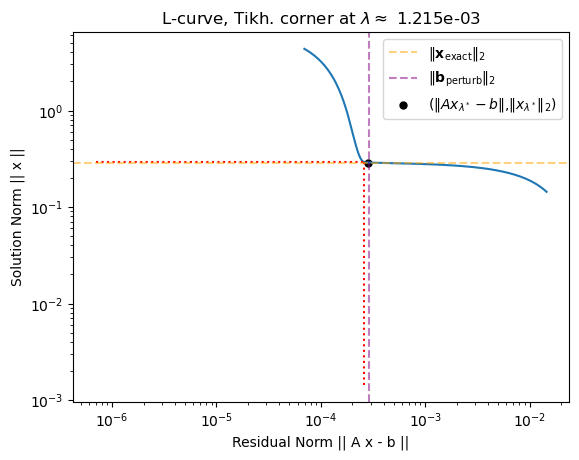

In [65]:
### Remake plot for the third RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# Get norm of x_exact and perturbation corresponding to first RHS
x3_exact_norm = np.linalg.norm(x3_exact)
b3_perturb_norm = np.linalg.norm(b3_perturb)

# L-curve for the first RHS
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# Get current axis
ax = plt.gca()

# Plot horizontal line at x1_exact (hint: use the axhline)
ax.axhline(x3_exact_norm, color="orange", alpha=0.5, ls="--", label="$\| \\mathbf{x}_{\\text{exact}} \|_2$")

# Plot vertical line at x1_exact (hint: use the axvline)
ax.axvline(b3_perturb_norm, color="purple", alpha=0.5, ls="--", label="$\| \\mathbf{b}_{\\text{perturb}} \|_2$")

# Add the point
ax.scatter( [np.linalg.norm((A @ xopt3) - b3_noisy)], [np.linalg.norm(xopt3)] , marker="o", color="k", s=25, label="($\| A x_{\\lambda^*} - b \|$,$\| x_{\\lambda^*} \|_2$)")

# Add legend
ax.legend()

plt.show()

**Response:**

# Problem 4.7 (Limitations of TSVD and Tikhonov Methods)

This exercise illustrates one of the limitations of TSVD and Tikhonov solutions, namely, that they are not so well suited for computing regularized solutions when the exact solution is discontinuous. We use the model problem `wing`, whose solution has has two discontinuities. Since we are mainly interested in the approximation properties of the TSVD and Tikhonov solutions, we do not add any noise in this exercise. 

## Part A

Generate the model problem using `wing`, plot the exact solution, and notice its form. Compute TSVD and Tikhonov solutions for various regularization parameters. Monitor the solutions and try to find the "best" value of $k$ and $\lambda$. Notice how difficult it is to reconstruct the discontinuities. 

In [30]:
# Define wing problem
A, b, x = wing(32)

# Use csvd to get the SVD of A
U, s, V = csvd(A)

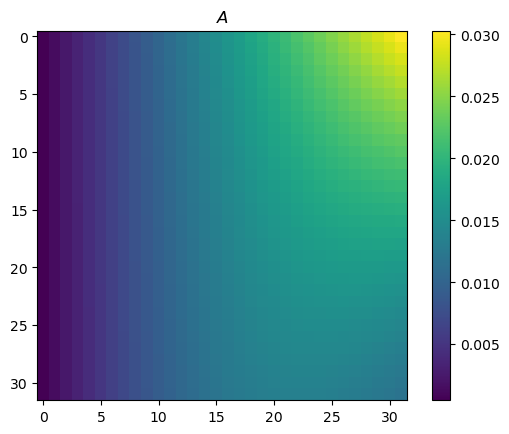

In [31]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

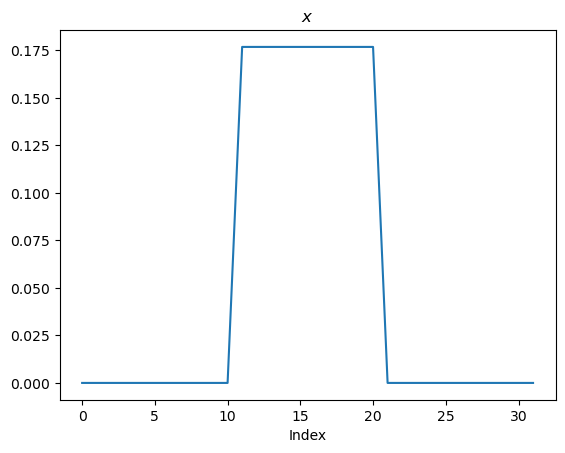

In [32]:
plt.plot(x)
plt.title("$x$")
plt.xlabel("Index")
plt.show()

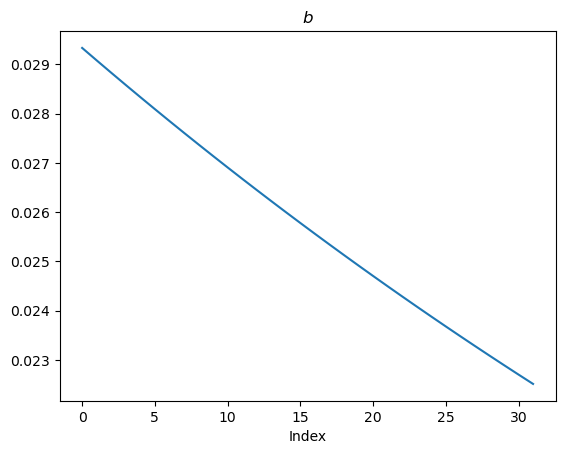

In [33]:
plt.plot(b)
plt.title("$b$")
plt.xlabel("Index")
plt.show()

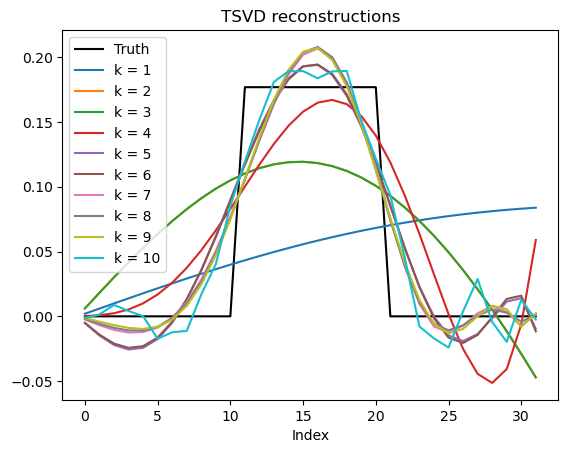

In [34]:
### Try to find the best value of k in the TSVD

plt.plot(x, label="Truth", color="k")

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in ks:
    xk, _, _ = tsvd(U, s, V, b, k)
    plt.plot(xk, label=f"k = {k}")

plt.xlabel("Index")
plt.title("TSVD reconstructions")
plt.legend()
plt.show()

In [34]:
### Try to find the best value of \lambda in the Tikhonov problem

def _opt_func(lambdah):
     x_lambdah = np.linalg.solve((A.T @ A) + (lambdah**2)*np.eye(A.shape[1]), A.T @ b)
     return np.linalg.norm( x - x_lambdah )

# Perform the minimization with bounds
opt_lambdah = minimize(_opt_func, 1e1, bounds=[(1e-12, 1e-4)], tol=1e-9)
opt_lambdah = opt_lambdah.x
xopt = np.linalg.solve((A.T @ A) + (opt_lambdah**2)*np.eye(A.shape[1]), A.T @ b)

print(f"Optimal lambda: {opt_lambdah[0]}")

Optimal lambda: 5.493762564509517e-08


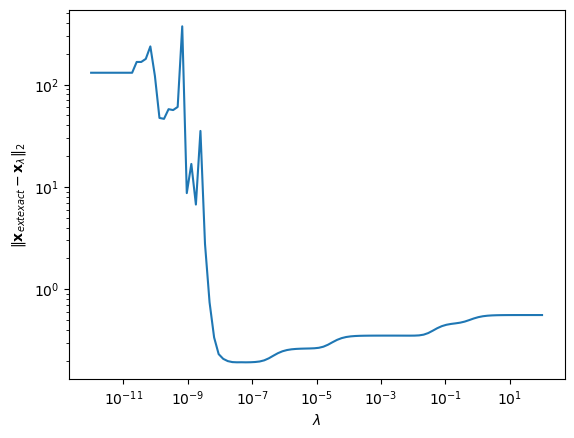

In [35]:
lambdahs = np.logspace(-12, 2, 100)
plt.loglog(lambdahs, [_opt_func(lambdah) for lambdah in lambdahs])
plt.xlabel("$\lambda$")
plt.ylabel("$\| \mathbf{x}_{\text{exact}} - \mathbf{x}_{\lambda} \|_2$")
plt.show()

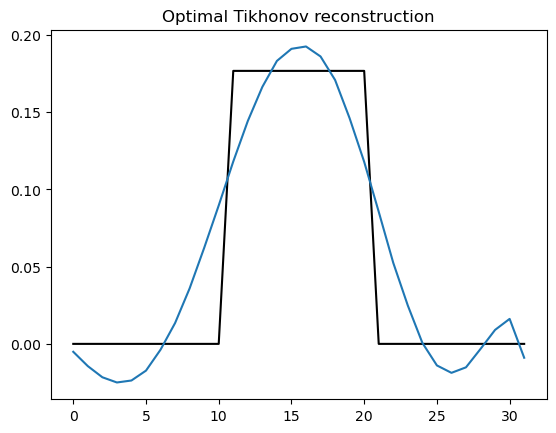

In [36]:
plt.plot(x, label="Truth", color="k")
plt.plot(xopt, label="With optimal $\lambda$")
plt.title("Optimal Tikhonov reconstruction")
plt.show()

**Response:**